In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg as linalg

import sympy as sp

# pretty-print sympy things
sp.init_printing()

# nice big latex-flavored plots
# if you don't have these fonts, or you don't have
# XeLaTeX installed, this needs to be modified.
fontsize = 20
newparams = {
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'lines.linewidth': 2, 
    'lines.markersize': 7,
    'font.family': "serif",
    'text.usetex': True,
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "pgf.preamble": [
        r"\usepackage{unicode-math}",
        r"\setmainfont{EB Garamond}",
        r"\setmonofont{Courier New}",
        r"\setmathfont[StylisticSet={2,7,10}]{Garamond-Math}",
    ],
    'figure.figsize': (16,9),
    'ytick.labelsize': fontsize,
    'xtick.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'legend.handlelength': 1.5,
    'xtick.major.pad': 8,
    'ytick.major.pad': 8,
}

# !!!
# for some reason, on some machines, you need to run this cell twice
# it probably has something to do with python versions or something
# !!!
%matplotlib inline

# makes mpl use the pgf-renderer. sometimes (but not on all machines)
# this disables rendering in the notebook.
# if this happens on your machine, maybe use
# another backend while working, and switch
# to pgf when you want to generate the final plots.
mpl.use('pgf')

# right angles never hurt anyone,
# so use classic as a base theme
plt.style.use('classic')
# the gray border is not visible in the plot rendered
# by plt.savefig, so dont't  worry about that

# finally change the necessary parameters
plt.rcParams.update(newparams)


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.ticker import MultipleLocator

In [13]:
def euler(f, y0, t):
    y = np.empty((len(t), 3))
    y[0] = y0
    
    for n in range(len(t) - 1):
        h = t[n + 1] - t[n]
        
        u = y[n] + np.array(f(t[n], y[n])) * h / 2
        m = np.array(f(t[n] + h/2, u), dtype=float)
        y[n + 1] = y[n] + h * m
        
    return y.T

In [14]:
I1, I2, I3 = 1, 2, 5


def f(t, m):
    x, y, z = m
    return [
        (1/I3 - 1/I2) * y * z,
        (1/I1 - 1/I3) * x * z,
        (1/I2 - 1/I1) * x * y,
    ]

In [15]:
t = np.linspace(0, 150, 150)

y0 = np.array([2, 3, 4], dtype=float)
y0 *= 1/linalg.norm(y0)

solution = euler(f, y0=y0, t=t)
xs, ys, zs = solution

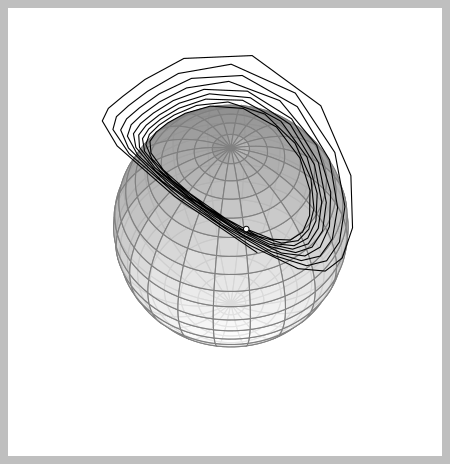

In [22]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho')

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

ax.plot_surface(
    x, y, z,
    rstride=5,
    cstride=5,
    #cmap=cm.gray,
    color='white',
    edgecolors='gray',
    alpha=0.8,
    linewidth=1,
    shade=True,
)

### because of small numerical errors,
### the points are just barely inside
### the sphere, so they are faded.
### this just gives the nicer color
eps = 1
cmap = cm.viridis

ax.plot(
    eps*xs, eps*ys, eps*zs,
    'k-',
    #c = (xs + ys + zs),
    #cmap=cmap,
    #alpha=1,
    #color='white',
    #edgecolors='black',
    #s=20,
    lw=1,
    label="Løysing $\mathbf m(t)$ med modifisert Euler's metode",
    zorder=6,
    markersize=4
)

if True:
    ax.plot(
        [y0[0]], [y0[1]], [y0[2]],
        'o',
        markerfacecolor='white',
        markeredgecolor='black',
        markersize=5,
        zorder=25,
        label="Initialverdi $\mathbf m_0$"
    )

[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('center') for t in ax.get_yticklabels()]

[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('center') for t in ax.get_xticklabels()]

[t.set_va('center') for t in ax.get_zticklabels()]
[t.set_ha('right')  for t in ax.get_zticklabels()]

ax.xaxis._axinfo['tick']['inward_factor']  = 0.1
ax.xaxis._axinfo['tick']['outward_factor'] = 0.1
ax.yaxis._axinfo['tick']['inward_factor']  = 0.1
ax.yaxis._axinfo['tick']['outward_factor'] = 0.1
ax.zaxis._axinfo['tick']['inward_factor']  = 0.1
ax.zaxis._axinfo['tick']['outward_factor'] = 0.1
ax.zaxis._axinfo['tick']['outward_factor'] = 0.1

ax.xaxis.set_major_locator(MultipleLocator(1/2))
ax.yaxis.set_major_locator(MultipleLocator(1/2))

ax.zaxis.set_major_locator(MultipleLocator(1))

ax.grid(False)
plt.axis('off')

ax.view_init(50, 45)
#ax.legend(numpoints=1)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.savefig('euler.pdf', bbox_inches = 'tight', pad_inches = 0)